In [2]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import pandas as pd
warnings.filterwarnings('ignore')

alpha = []
v = []
sigma = []
x0 = []

In [3]:
def BrownianMotion(num_steps=500, scale=1):
    walk = np.zeros(num_steps)
    steps = np.random.normal(loc=0, scale=scale, size=num_steps)
    walk = np.cumsum(steps)
    return walk

Text(0.5, 1.0, 'Initializations: $\\alpha=5,v=2, \\sigma=0.5,  x_0=0$')

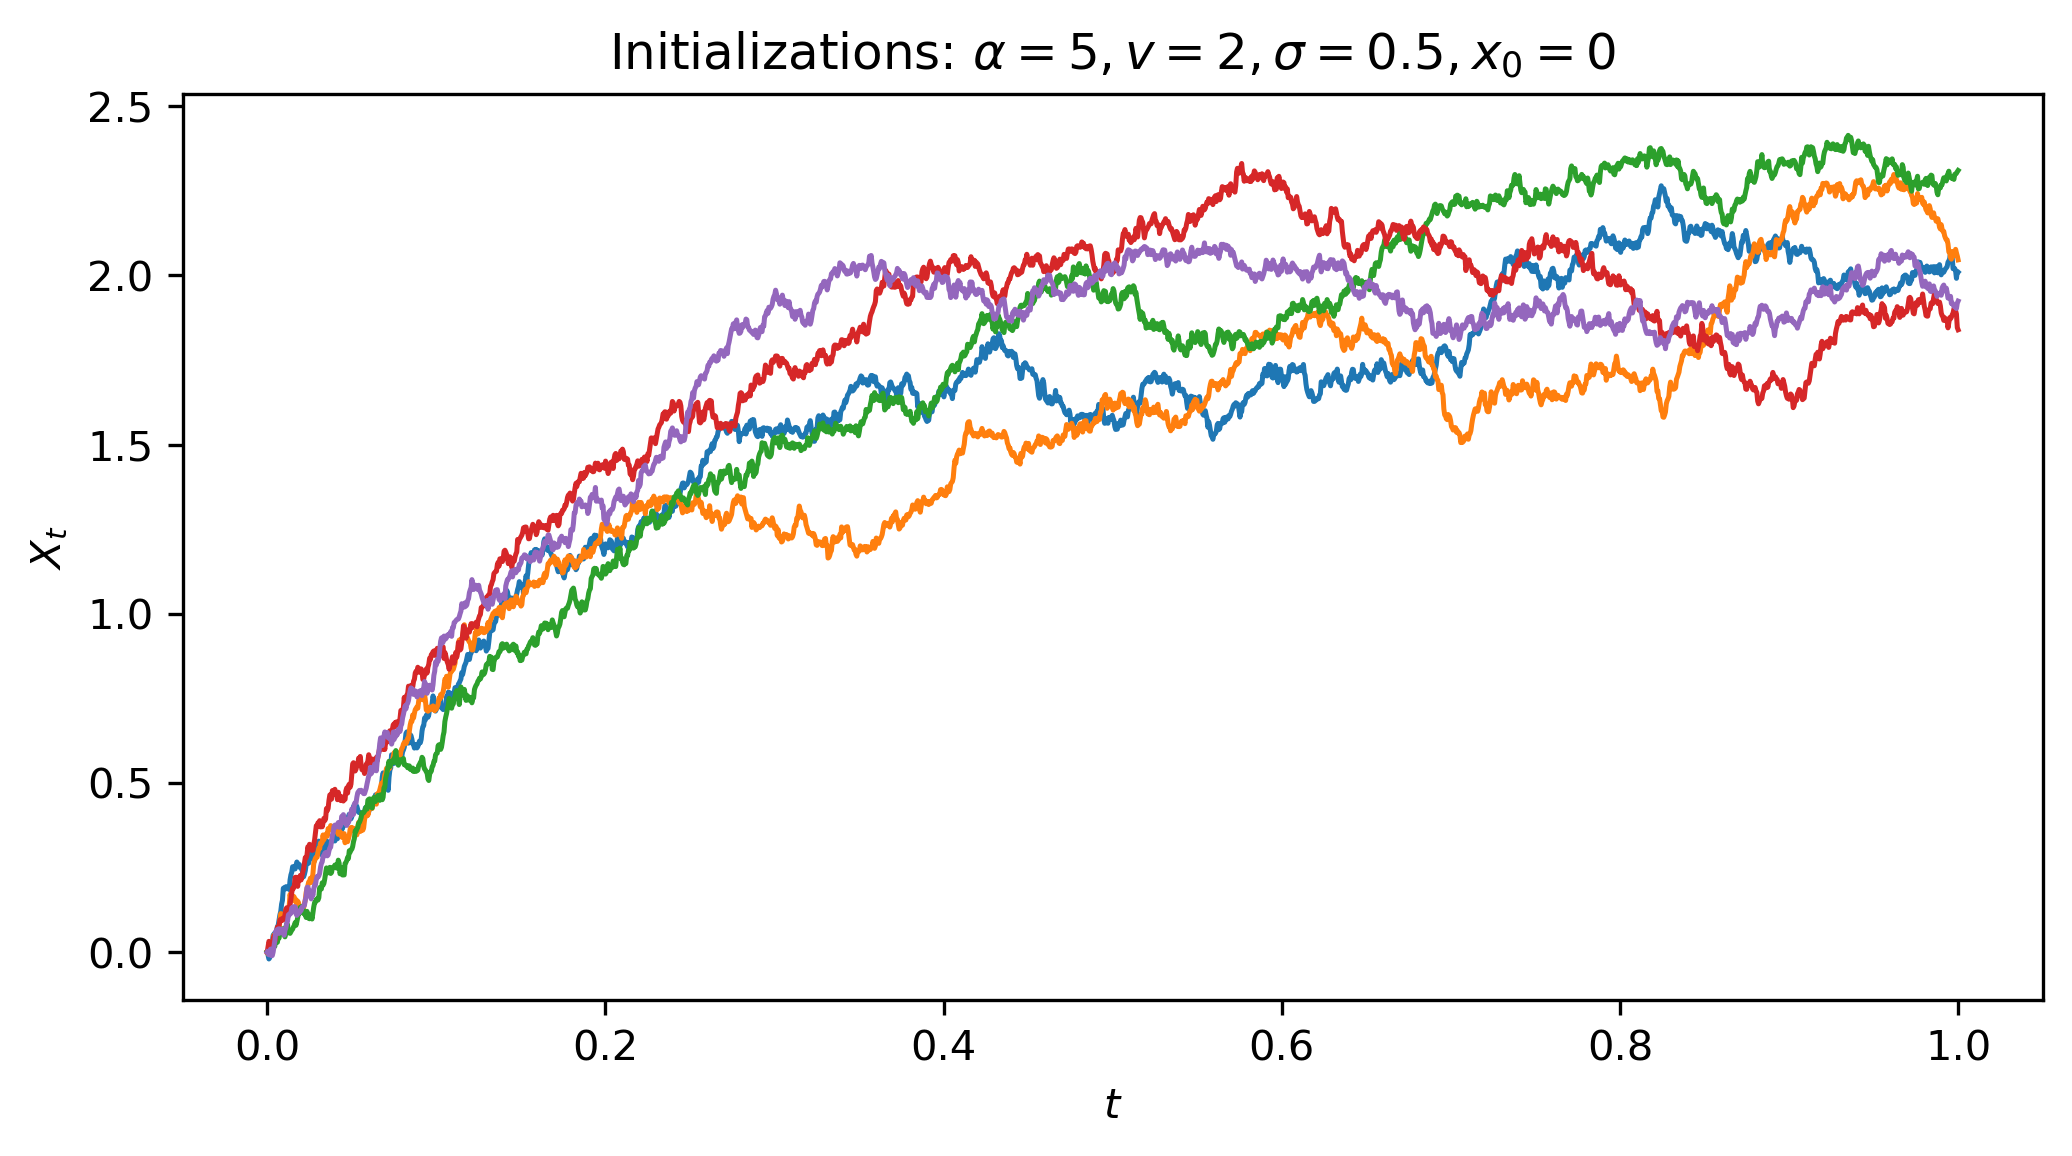

In [4]:
alpha = 5
v=2
sigma= 0.5
x0=0
dt = 1/2000
step = 2000
t = dt * step

def simulate(alpha, v, sigma, x0, dt, step=500):
    df_sde = pd.DataFrame(np.zeros((step, 4)), columns=['Xt', 'dXt', 'Bt', 'dBt'])
    df_sde.loc[1:, 'Bt'] = BrownianMotion(num_steps=step-1, scale=np.sqrt(dt))
    df_sde.loc[0, 'Xt'] = x0
    df_sde.loc[0, 'dXt'] = np.nan
    df_sde.loc[0, 'dBt'] = np.nan    
    for i in range(1, step):
        df_sde.loc[i, 'dBt'] = df_sde.loc[i, 'Bt'] - df_sde.loc[i-1, 'Bt']
        df_sde.loc[i, 'dXt'] = alpha * (v - df_sde.loc[i-1, 'Xt']) * dt + sigma * df_sde.loc[i, 'dBt']
        df_sde.loc[i, 'Xt'] = df_sde.loc[i-1, 'Xt'] + df_sde.loc[i, 'dXt']
    return df_sde

num_sim = 5
plt.figure(dpi=300, figsize=(8,4))
for i in range(num_sim):
    df = simulate(alpha=alpha, v=v, sigma=sigma, x0=x0, dt=dt, step=step)
    sns.lineplot(np.linspace(0, t, step), df['Xt'], lw=1.2)

plt.xlabel('$t$')
plt.ylabel('$X_t$')
plt.title(f'Initializations: $\\alpha={alpha},v={v}, \\sigma={sigma},  x_0={x0}$')

In [5]:
X1_list = []
mc_sim_num = 500
import tqdm
for i in tqdm.trange(mc_sim_num):
    df = simulate(alpha=alpha, v=v, sigma=sigma, x0=x0, dt=dt, step=step)
    X1_list.append(df.iloc[-1, 0])
X1_list

100%|█████████████████████████████████████████| 500/500 [02:45<00:00,  3.02it/s]


[1.8219577690934672,
 2.171739880100566,
 2.022603517204685,
 2.0784856285135436,
 1.9034658420734576,
 1.9246629953989802,
 1.7163861557978939,
 1.8180597529216131,
 2.022118290195563,
 2.2284379149025426,
 2.250993579908121,
 2.0107144740133953,
 1.9356352176181442,
 1.7535565886024218,
 1.5812234148083888,
 2.143225754136154,
 2.2779093958851147,
 1.8958552855938462,
 1.9587064417188016,
 2.1397410310718197,
 2.204696194957133,
 1.9934333909942623,
 2.084566578197186,
 1.8511433537718975,
 2.0031076643225063,
 2.2260803736632786,
 1.6588142929763172,
 1.8731889604062557,
 1.9652860533525396,
 2.2089198177422484,
 1.8211055517803534,
 2.032166514912281,
 1.8909633770308292,
 1.6043054491339257,
 1.8421514070206353,
 2.004524934734298,
 1.9771212509299612,
 1.7100944290817586,
 2.18148312643909,
 2.025921928606769,
 1.812167791244686,
 2.0714924279135767,
 1.8890694098779912,
 1.8453613891015,
 1.9744790285770295,
 2.0965951064706507,
 1.9602281163722692,
 2.2372686548738536,
 2.01307

In [6]:
print(np.mean(X1_list), np.var(X1_list), np.std(X1_list))

1.986711298027788 0.02467369029118769 0.1570786118196481


<AxesSubplot:ylabel='Density'>

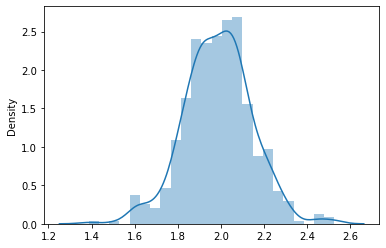

In [7]:
sns.distplot(X1_list)

Text(0.5, 1.0, 'Effect of $\\alpha$')

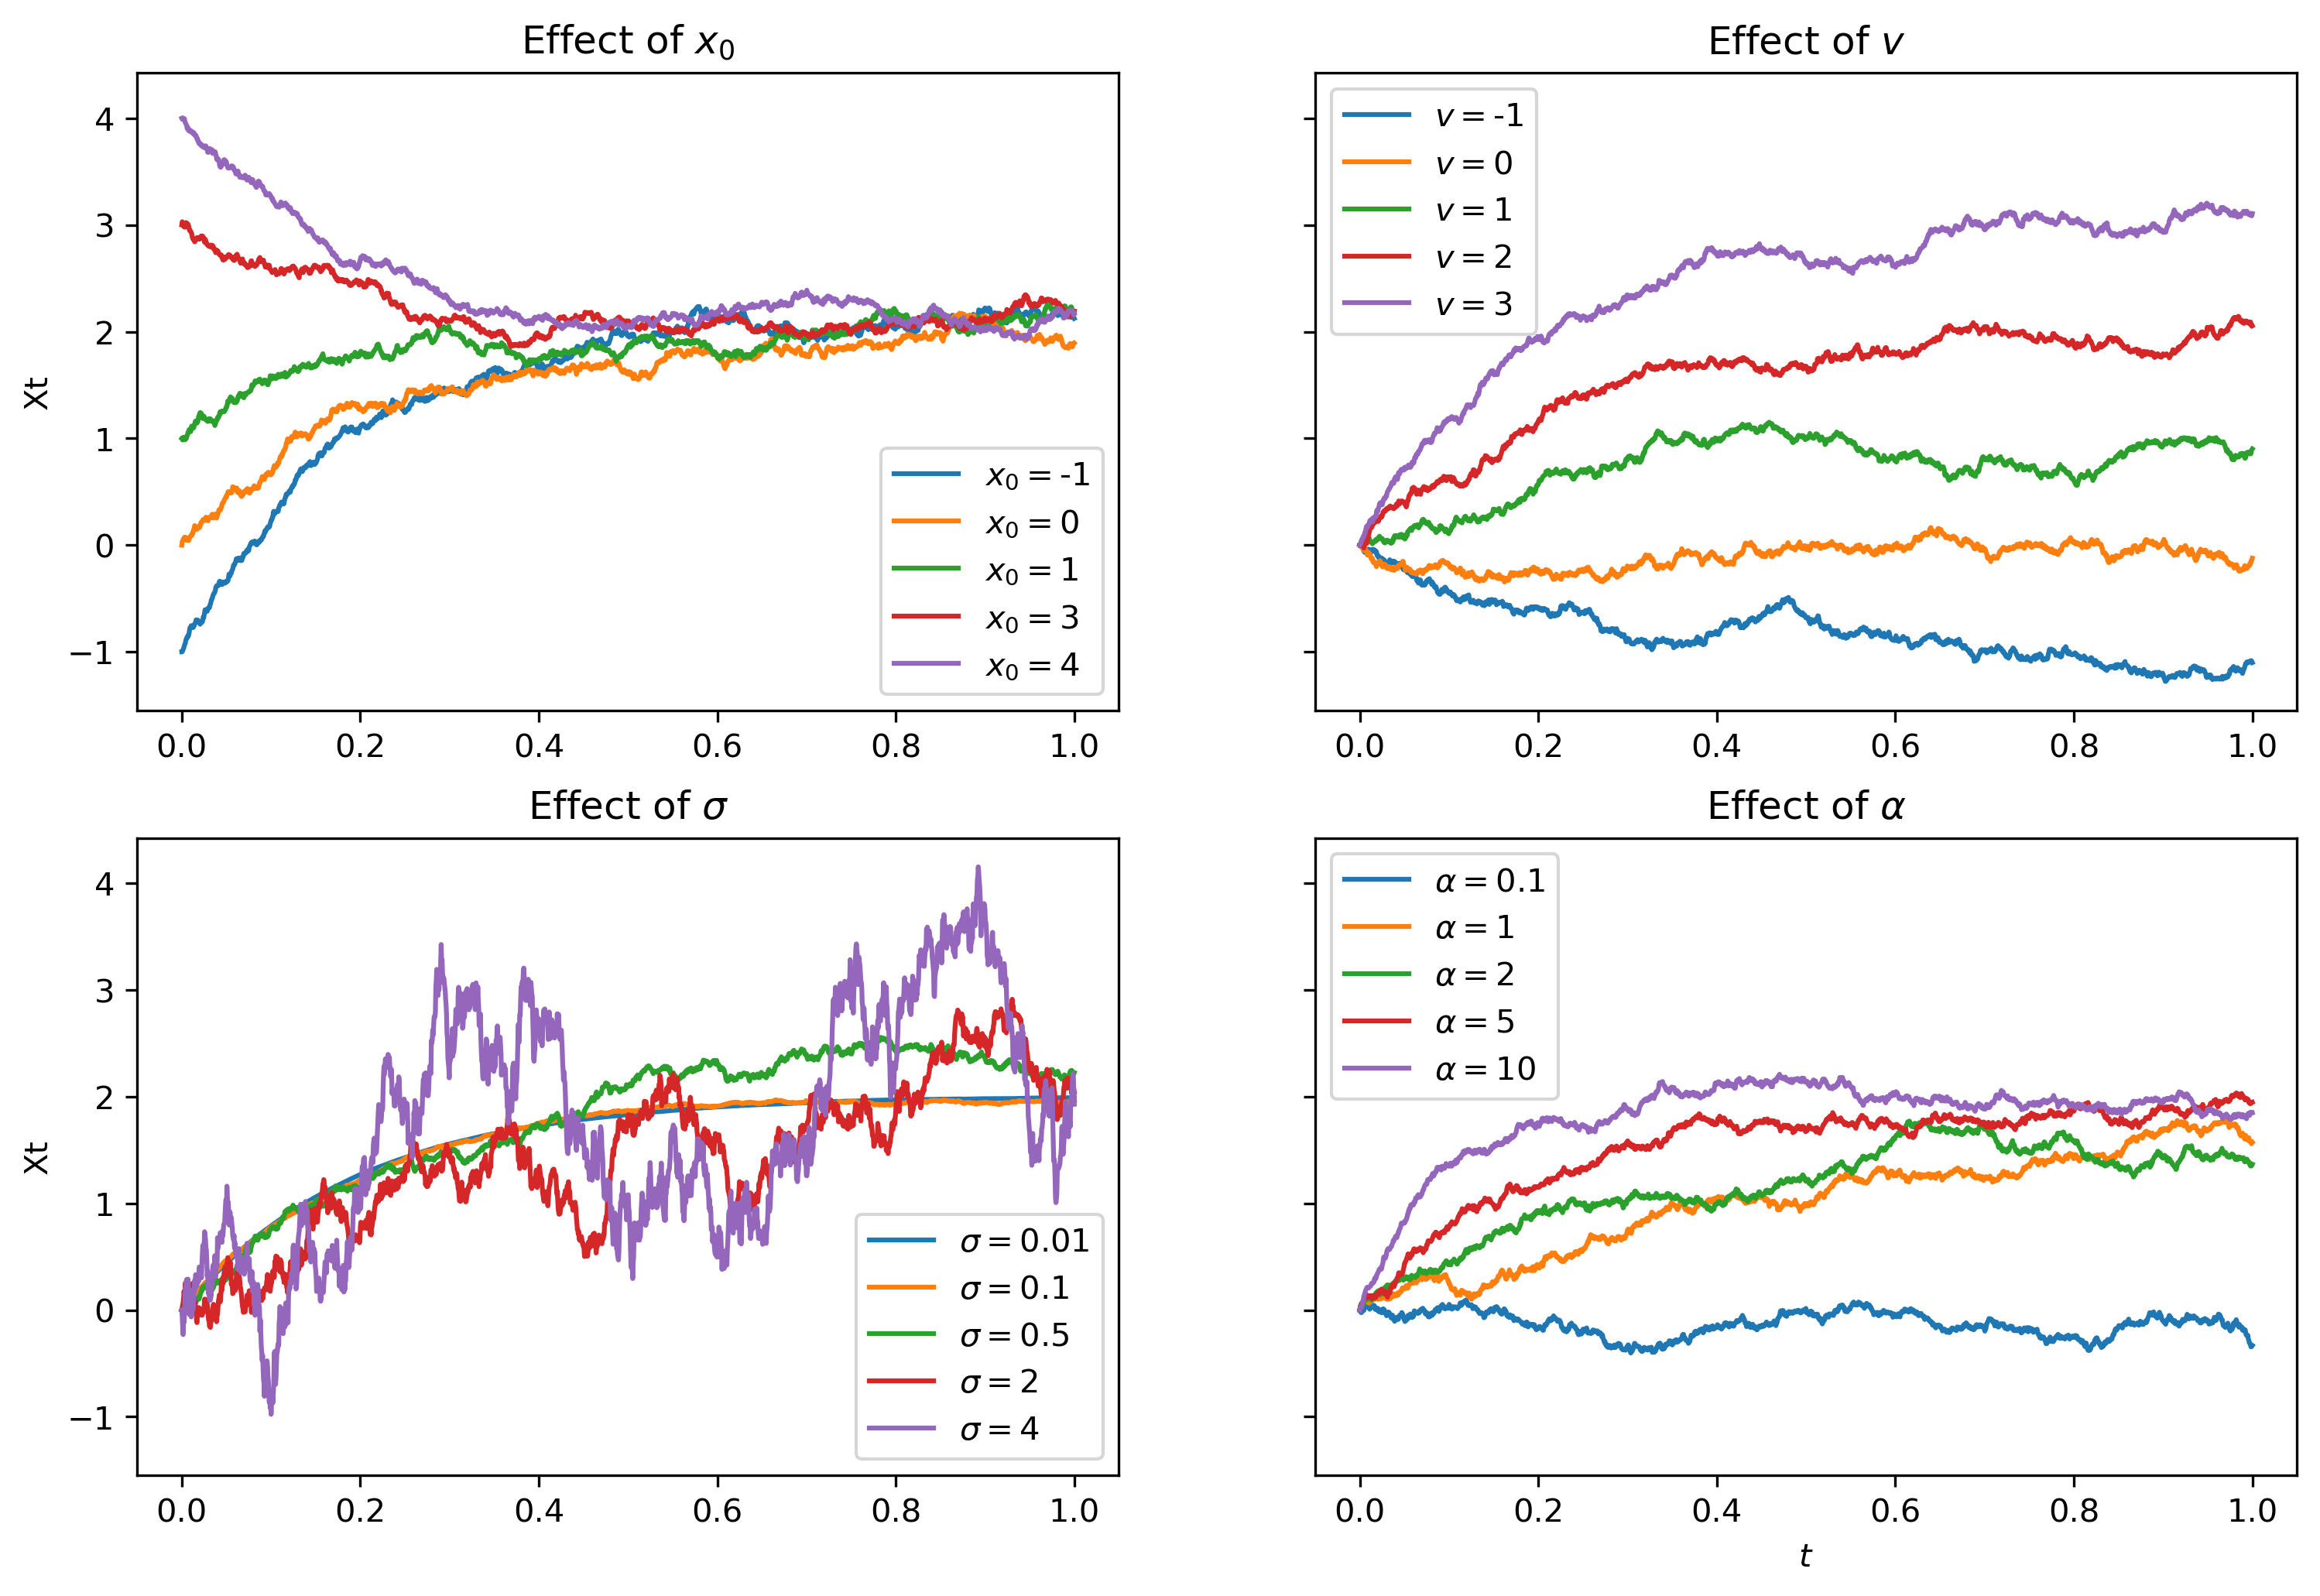

In [30]:
# plt.figure(dpi=300, figsize=(8,4))
fig, ax = plt.subplots(nrows=2,ncols=2, dpi=300, figsize=(12,8), sharey=True)
axes = ax.flatten()
x0_list = [-1, 0, 1, 3, 4]
v_list = [-1, 0, 1, 2, 3]
sigma_list = [0.01, 0.1, 0.5, 2, 4]
alpha_list = [0.1, 1,2, 5, 10]

for x in x0_list:
    df = simulate(alpha=alpha, v=v, sigma=sigma, x0=x, dt=dt, step=step)
    sns.lineplot(np.linspace(0, t, step), df['Xt'], lw=1.5, ax=axes[0], label=f'$x_0=${x}')
    
for vi in v_list:
    df = simulate(alpha=alpha, v=vi, sigma=sigma, x0=x0, dt=dt, step=step)
    sns.lineplot(np.linspace(0, t, step), df['Xt'], lw=1.5, ax=axes[1], label=f'$v=${vi}')   
    
for sig in sigma_list:
    df = simulate(alpha=alpha, v=v, sigma=sig, x0=x0, dt=dt, step=step)
    sns.lineplot(np.linspace(0, t, step), df['Xt'], lw=1.5, ax=axes[2], label=f'$\\sigma=${sig}')  

for a in alpha_list:
    df = simulate(alpha=a, v=v, sigma=sigma, x0=x0, dt=dt, step=step)
    sns.lineplot(np.linspace(0, t, step), df['Xt'], lw=1.5, ax=axes[3], label=f'$\\alpha=${a}')  

plt.xlabel('$t$')
plt.ylabel('$X_t$')

axes[0].set_title(f'Effect of $x_0$')
axes[1].set_title(f'Effect of $v$')
axes[2].set_title(f'Effect of $\\sigma$')
axes[3].set_title(f'Effect of $\\alpha$')
# plt.tight_layout()

In [130]:
X2_list = []
mc_sim_num = 30
import tqdm
for i in tqdm.trange(mc_sim_num):
    df = simulate(alpha=alpha, v=v, sigma=sigma, x0=x0, dt=dt, step=step)
    X2_list.append(df.iloc[-1, 0])
print(np.mean(X2_list), np.var(X2_list), np.std(X2_list))

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:06<00:00,  4.37it/s]

1.9887502903331529 0.019736225408906016 0.1404856768816879
